In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

cwd = os.getcwd()

cpi_input1 = pd.read_excel(cwd + '/CPI_Aggregate.xlsx', sheet_name='Data1')
cpi_input2 = pd.read_excel(cwd + '/CPI_Group.xlsx', sheet_name='Data1')
wpi_input = pd.read_excel(cwd + '/WPI_Aggregate.xlsx', sheet_name='Data1')

In [3]:
cpi_input2.head(15)

,Unnamed: 0,Index Numbers ; Food and non-alcoholic beverages ; Australia ;,Index Numbers ; Alcohol and tobacco ; Australia ;,Index Numbers ; Clothing and footwear ; Australia ;,Index Numbers ; Housing ; Australia ;,"Index Numbers ; Furnishings, household equipment and services ; Australia ;",Index Numbers ; Health ; Australia ;,Index Numbers ; Transport ; Australia ;,Index Numbers ; Communication ; Australia ;,Index Numbers ; Recreation and culture ; Australia ;,...,Percentage Change from Previous Period ; Clothing and footwear ; Australia ;,Percentage Change from Previous Period ; Housing ; Australia ;,"Percentage Change from Previous Period ; Furnishings, household equipment and services ; Australia ;",Percentage Change from Previous Period ; Health ; Australia ;,Percentage Change from Previous Period ; Transport ; Australia ;,Percentage Change from Previous Period ; Communication ; Australia ;,Percentage Change from Previous Period ; Recreation and culture ; Australia ;,Percentage Change from Previous Period ; Education ; Australia ;,Percentage Change from Previous Period ; Insurance and financial services ; Australia ;,Percentage Change from Previous Period ; All groups CPI ; Australia ;
0,Unit,Index Numbers,Index Numbers,Index Numbers,Index Numbers,Index Numbers,Index Numbers,Index Numbers,Index Numbers,Index Numbers,...,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent
1,Series Type,Original,Original,Original,Original,Original,Original,Original,Original,Original,...,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original
2,Data Type,INDEX,INDEX,INDEX,INDEX,INDEX,INDEX,INDEX,INDEX,INDEX,...,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT
3,Frequency,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,...,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter
4,Collection Month,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
5,Series Start,1972-09-01 00:00:00,1972-09-01 00:00:00,1972-09-01 00:00:00,1972-09-01 00:00:00,1972-09-01 00:00:00,1989-09-01 00:00:00,1972-09-01 00:00:00,1972-09-01 00:00:00,1989-09-01 00:00:00,...,1972-12-01 00:00:00,1972-12-01 00:00:00,1972-12-01 00:00:00,1989-12-01 00:00:00,1972-12-01 00:00:00,1972-12-01 00:00:00,1989-12-01 00:00:00,1982-06-01 00:00:00,2005-09-01 00:00:00,1948-12-01 00:00:00
6,Series End,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,...,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00,2024-03-01 00:00:00
7,No. Obs,207,207,207,207,207,139,207,207,139,...,206,206,206,138,206,206,138,168,75,302
8,Series ID,A2325891R,A2326116V,A2325936J,A2325981V,A2326026R,A2331111C,A2326071A,A2331201J,A2331246L,...,A2325940X,A2325985C,A2326030F,A2331115L,A2326075K,A2331205T,A2331250C,A2331430L,A2332600K,A2325850V
9,1948-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
cpiBygroup = cpi_input2.iloc[9:,0:13].dropna()
cpiBygroup.columns = ['Period','Food and non-alcoholic beverages', 'Alcohol and tobacco', 'Clothing and footwear','Housing','Furnishings, household equipment and services',
                    'Health','Transport','Communication','Recreation and culture','Education','Financial services and insurance','All group']
refPeriod = cpiBygroup['Period'].iloc[0]
cpiBygroup

,Period,Food and non-alcoholic beverages,Alcohol and tobacco,Clothing and footwear,Housing,"Furnishings, household equipment and services",Health,Transport,Communication,Recreation and culture,Education,Financial services and insurance,All group
236,2005-06-01 00:00:00,78.9,72.7,101,73.6,94.5,75.8,85.6,97.4,96,71.8,85.1,82.6
237,2005-09-01 00:00:00,79.5,73.4,101.1,74.6,94.8,75,88.4,96.7,97.2,71.9,85.2,83.4
238,2005-12-01 00:00:00,81,73.8,101,75.1,95.4,74.2,88,96,97.2,71.9,86.5,83.8
239,2006-03-01 00:00:00,82.1,74.7,98.4,75.6,95.1,77.5,89.1,96.4,97.8,76,86,84.5
240,2006-06-01 00:00:00,85.5,75.4,99.3,76.2,95.8,79.3,92.1,96.5,97.5,76,87,85.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2023-03-01 00:00:00,127.6,186.1,96.4,141.7,121.1,157.6,126.7,77.4,120.9,153.9,127.6,132.6
308,2023-06-01 00:00:00,129.7,188,97,142.9,123.6,157.5,126.6,77.1,120.6,153.6,131.4,133.7
309,2023-09-01 00:00:00,130.5,190.7,97.4,146,122.6,158.7,130.7,78.7,120.8,153,133.2,135.3
310,2023-12-01 00:00:00,131.2,196.1,97.9,147.5,121.4,159.6,130.5,79,121.2,152.9,135.4,136.1


In [40]:
cpiBygroup_adjusted = cpiBygroup.copy()

for col in cpiBygroup_adjusted.columns[1:]:
    cpiBygroup_adjusted[col] = cpiBygroup_adjusted[col] / cpiBygroup_adjusted[col].iloc[0] * 100

cpiBygroup_adjusted

,Period,Food and non-alcoholic beverages,Alcohol and tobacco,Clothing and footwear,Housing,"Furnishings, household equipment and services",Health,Transport,Communication,Recreation and culture,Education,Financial services and insurance,All group
236,2005-06-01 00:00:00,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
237,2005-09-01 00:00:00,100.760456,100.962861,100.09901,101.358696,100.31746,98.944591,103.271028,99.281314,101.25,100.139276,100.117509,100.968523
238,2005-12-01 00:00:00,102.661597,101.513067,100.0,102.038043,100.952381,97.889182,102.803738,98.562628,101.25,100.139276,101.645123,101.452785
239,2006-03-01 00:00:00,104.055767,102.751032,97.425743,102.717391,100.634921,102.242744,104.088785,98.973306,101.875,105.849582,101.057579,102.300242
240,2006-06-01 00:00:00,108.365019,103.713893,98.316832,103.532609,101.375661,104.617414,107.593458,99.075975,101.5625,105.849582,102.232667,103.995157
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2023-03-01 00:00:00,161.723701,255.983494,95.445545,192.527174,128.148148,207.915567,148.014019,79.466119,125.9375,214.345404,149.941246,160.532688
308,2023-06-01 00:00:00,164.385298,258.596974,96.039604,194.157609,130.793651,207.783641,147.897196,79.158111,125.625,213.927577,154.40658,161.864407
309,2023-09-01 00:00:00,165.39924,262.310867,96.435644,198.369565,129.73545,209.366755,152.686916,80.800821,125.833333,213.091922,156.521739,163.801453
310,2023-12-01 00:00:00,166.286439,269.738652,96.930693,200.407609,128.465608,210.55409,152.453271,81.10883,126.25,212.952646,159.106933,164.769976


<Axes: xlabel='Period'>

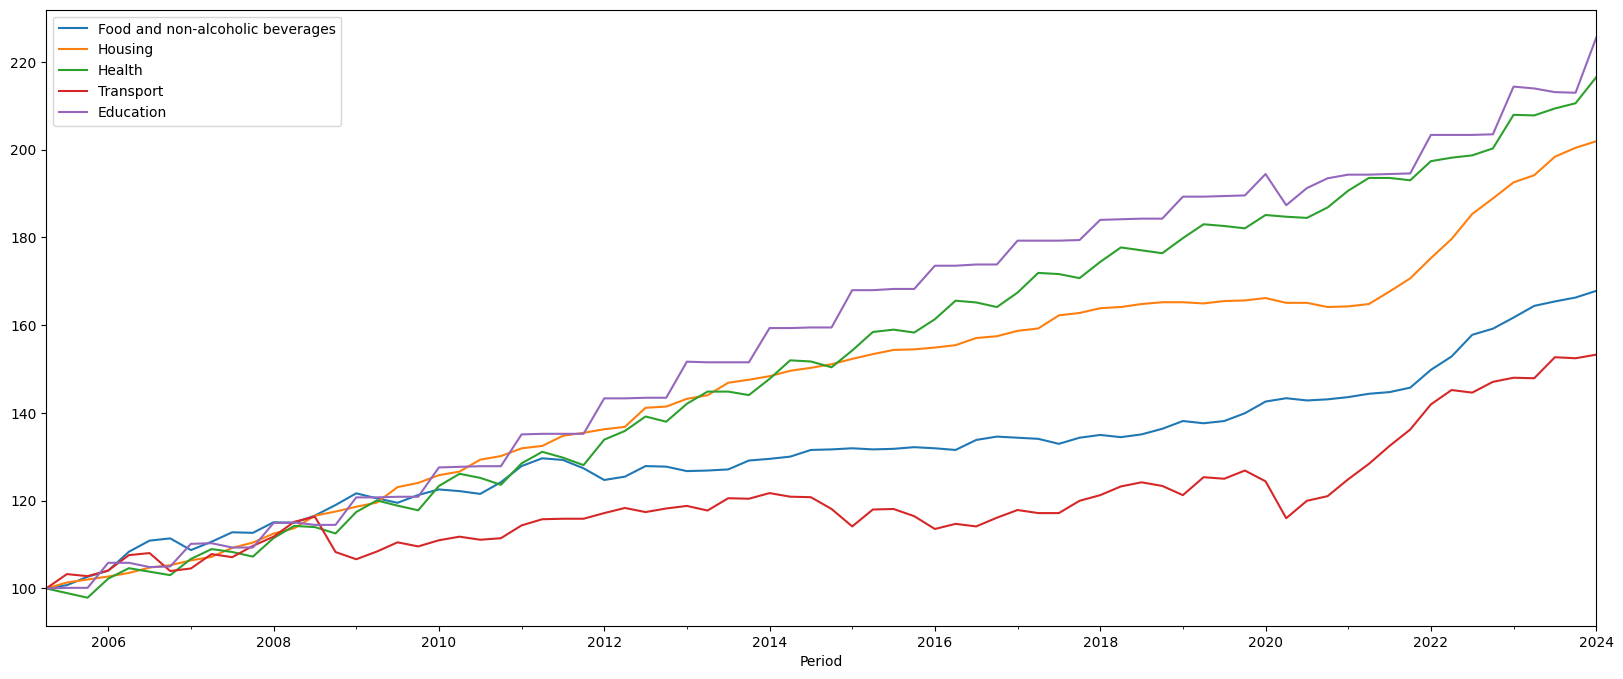

In [42]:
selectedGroup = [
    'Food and non-alcoholic beverages', 
    'Housing', 
    'Health', 
    'Transport', 
    'Education']

cpiBygroup_adjusted.plot(x='Period', y=selectedGroup, kind='line', figsize=(20, 8))

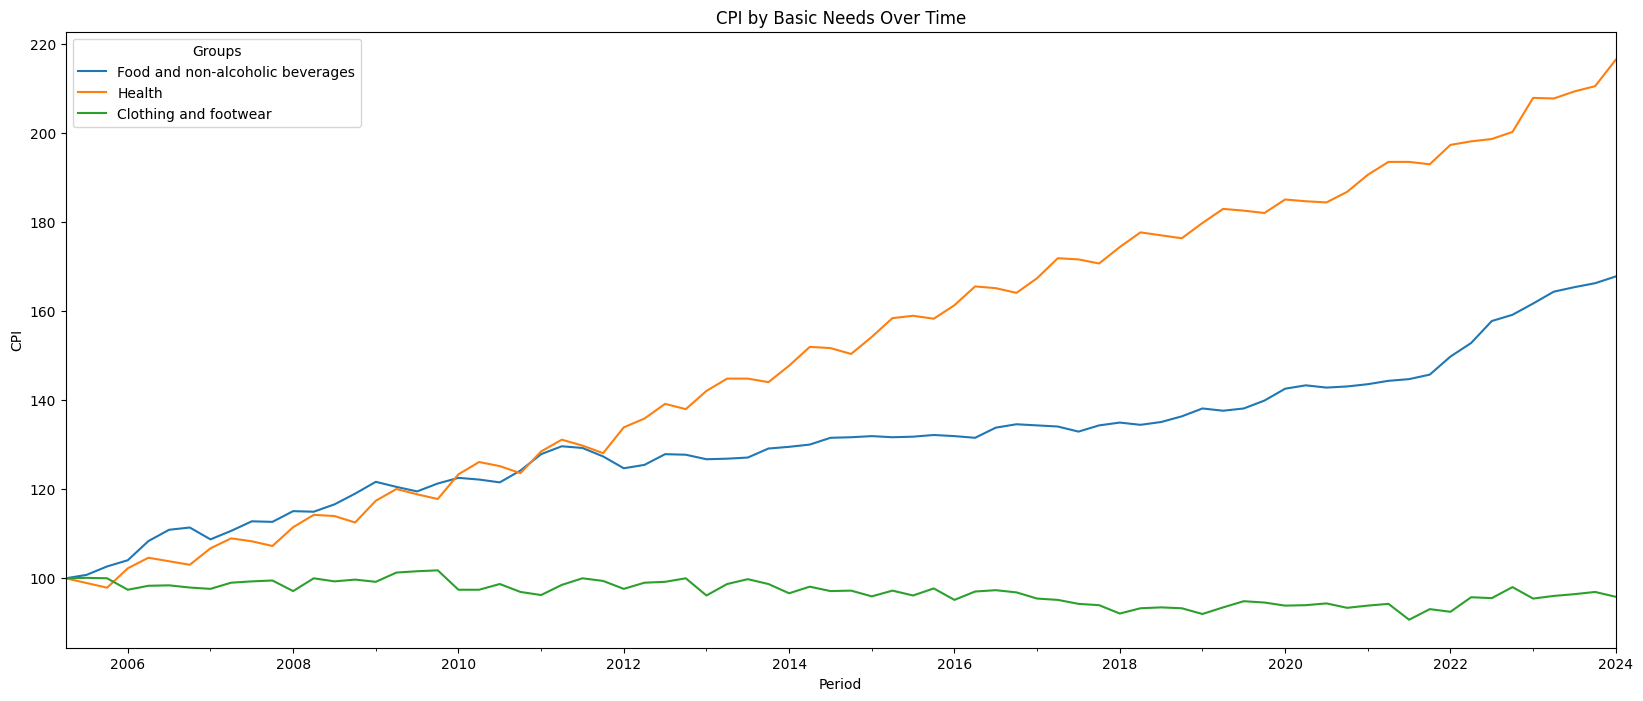

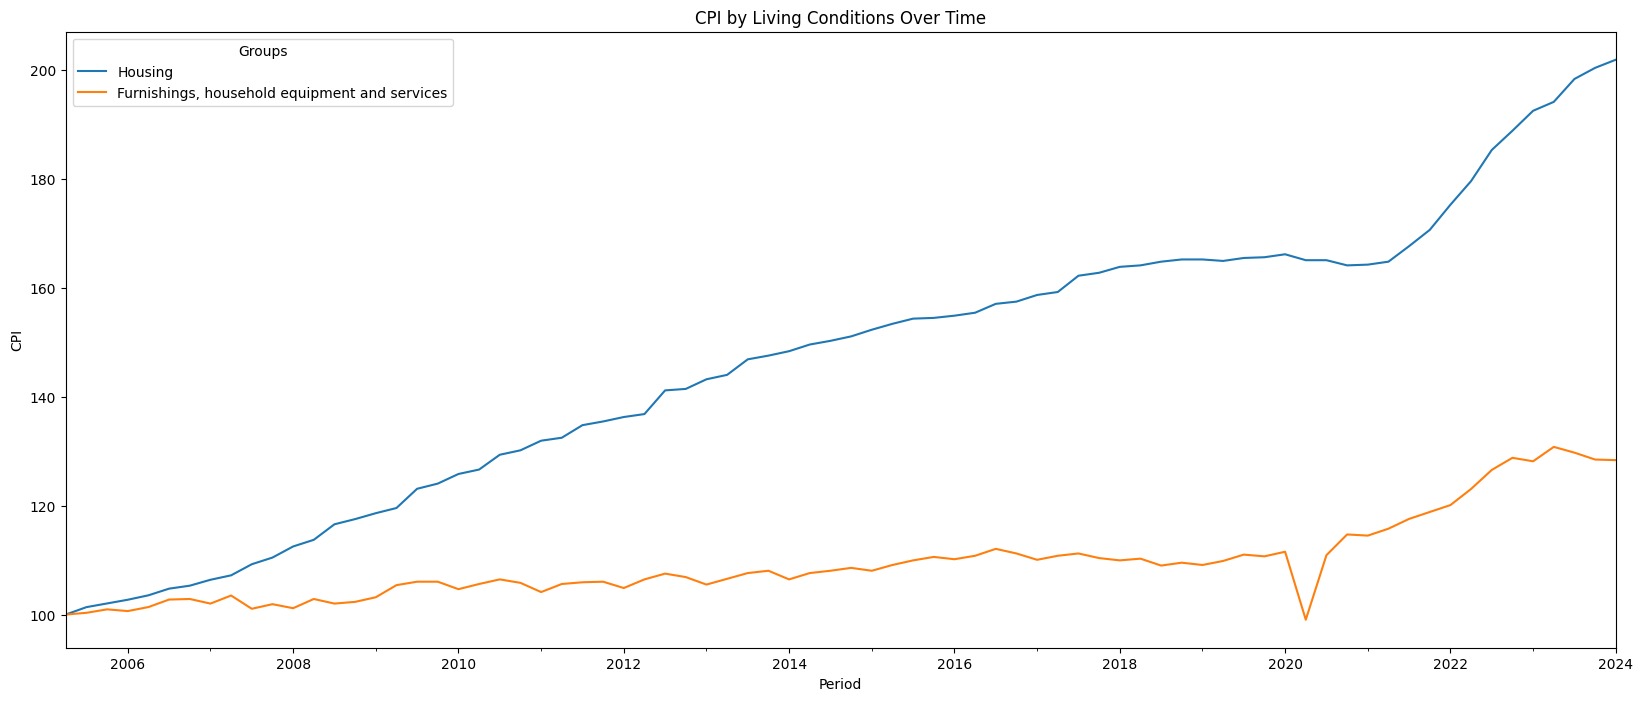

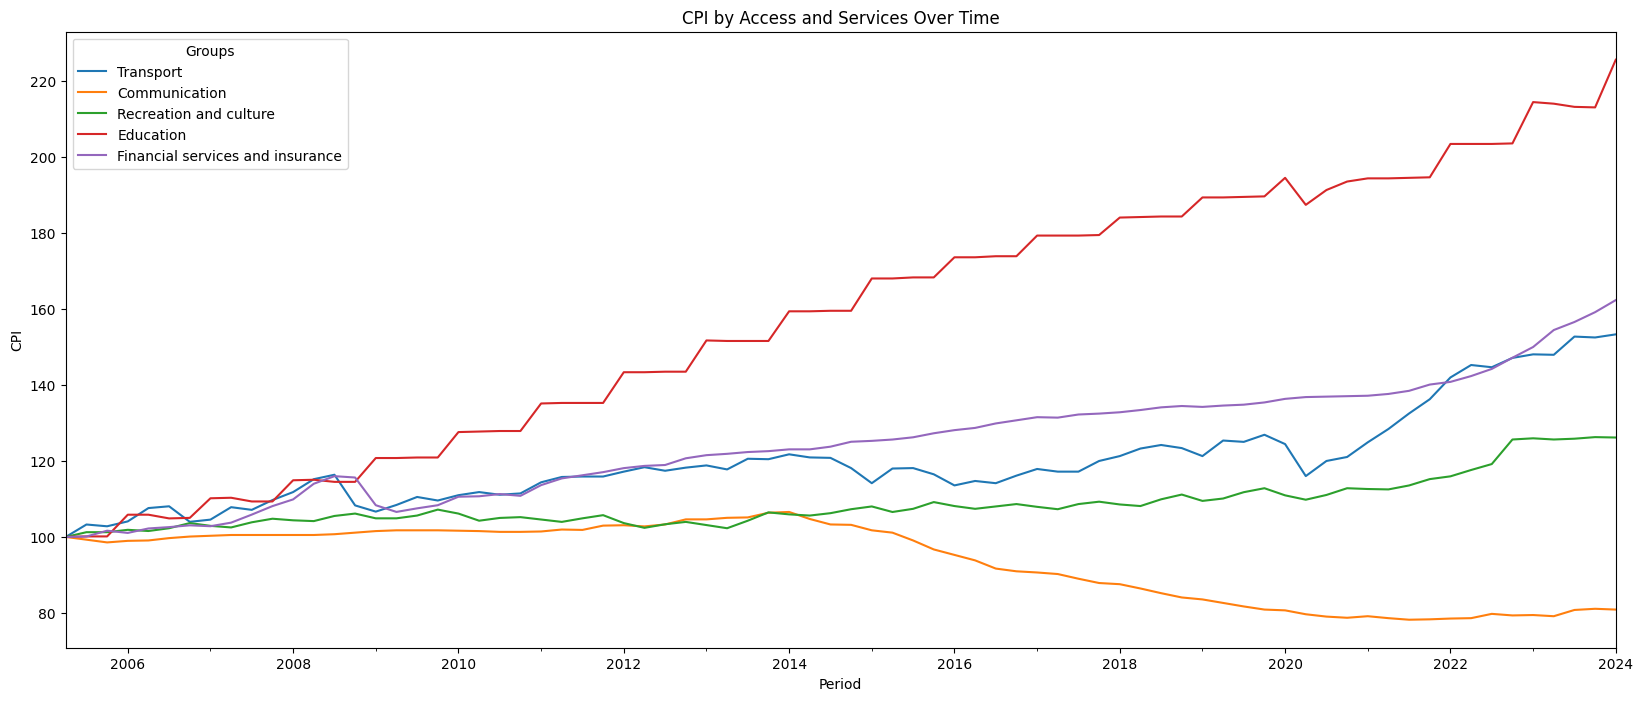

In [50]:
categories = {
    'Basic Needs': ['Food and non-alcoholic beverages', 'Health', 'Clothing and footwear'],
    'Living Conditions': ['Housing', 'Furnishings, household equipment and services'],
    'Access and Services': ['Transport', 'Communication', 'Recreation and culture', 'Education', 'Financial services and insurance']
}

# If you want to plot them category-wise:
for category, groups in categories.items():
    cpiBygroup_adjusted.plot(x='Period', y=groups, kind='line', figsize=(20, 8), title=category)
    plt.xlabel('Period')
    plt.ylabel('CPI')
    plt.legend(title='Groups')
    plt.title(f'CPI by {category} Over Time')
    plt.show()
